<a href="https://colab.research.google.com/github/musicjae/Hands_on_ML/blob/master/(3_sub)Softmax_with_Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving Iris.csv to Iris.csv
User uploaded file "Iris.csv" with length 5107 bytes


In [6]:
from IPython.display import Image

소프트맥스 분류기는 로지스틱 분류기의 확장이고 따라서 분류의 범주에 들어간다. 더욱이 이것은 다항 클래스 분류기로서 많이 사용된다. 이 분류기에서 softmax 함수는 $f(x;W)=Wx_i$를 사상하는 함수이고, 이것은 scores라고 불린다.

#1. 크로스엔트로피에 기반한 소프트맥스
  
소프트맥스는 크로스엔트로피Cross-Entropy에 기반한다. 이것은 참인 분포 P와 추정 분포 Q 간의 차이를 측정해주는 함수를 가진다. 크로스 엔트로피는 다음과 같다:  
$$H_p (q)=−\sum_{i=1}^{n}  p(x_i) log{q(x_i)}$$  
여기서 $p$는 모델링으로 구한 정답이고, $P$는 추정값이다. 위 식을 보면 알 수 있듯이,   
- 참값 $=$ 추정값 --> 0  
- 참값 $\ne$ 추정값 --> 무한대 수렴 이다.
  
따라서 이것은 예측이 잘 될수록 함숫값이 0으로 수렴하는 특징을 갖기 때문에 손실이 낮을수록 좋은 학습 과정에서 사용되기 적합해 보인다.  
이것을 기반으로 고안된 softmax도 비슷한 역할을 수행한다. 아래는 소프트맥스 손실 함수이다:  

$$ L_i = -log(\frac{e^{f_{yi}}}{\sum_j e^{f_{j}}})$$

# 2. 로지스틱 분류 vs 소프트맥스 분류  
  
로지스틱은 이항 분류인 반면에, 소프트맥스는 다항 분류이다. 따라서 우리는 어떤 목적을 가지고 분류 작업을 수행하느냐에 따라 다른 분류 방법을 선택해야 할 것이다. (물론 로지스틱을 여러 개 활용하여 다항 분류를 수행할 수도 있다.) 이들은 아래 같이 다른 과정을 지닌다. 

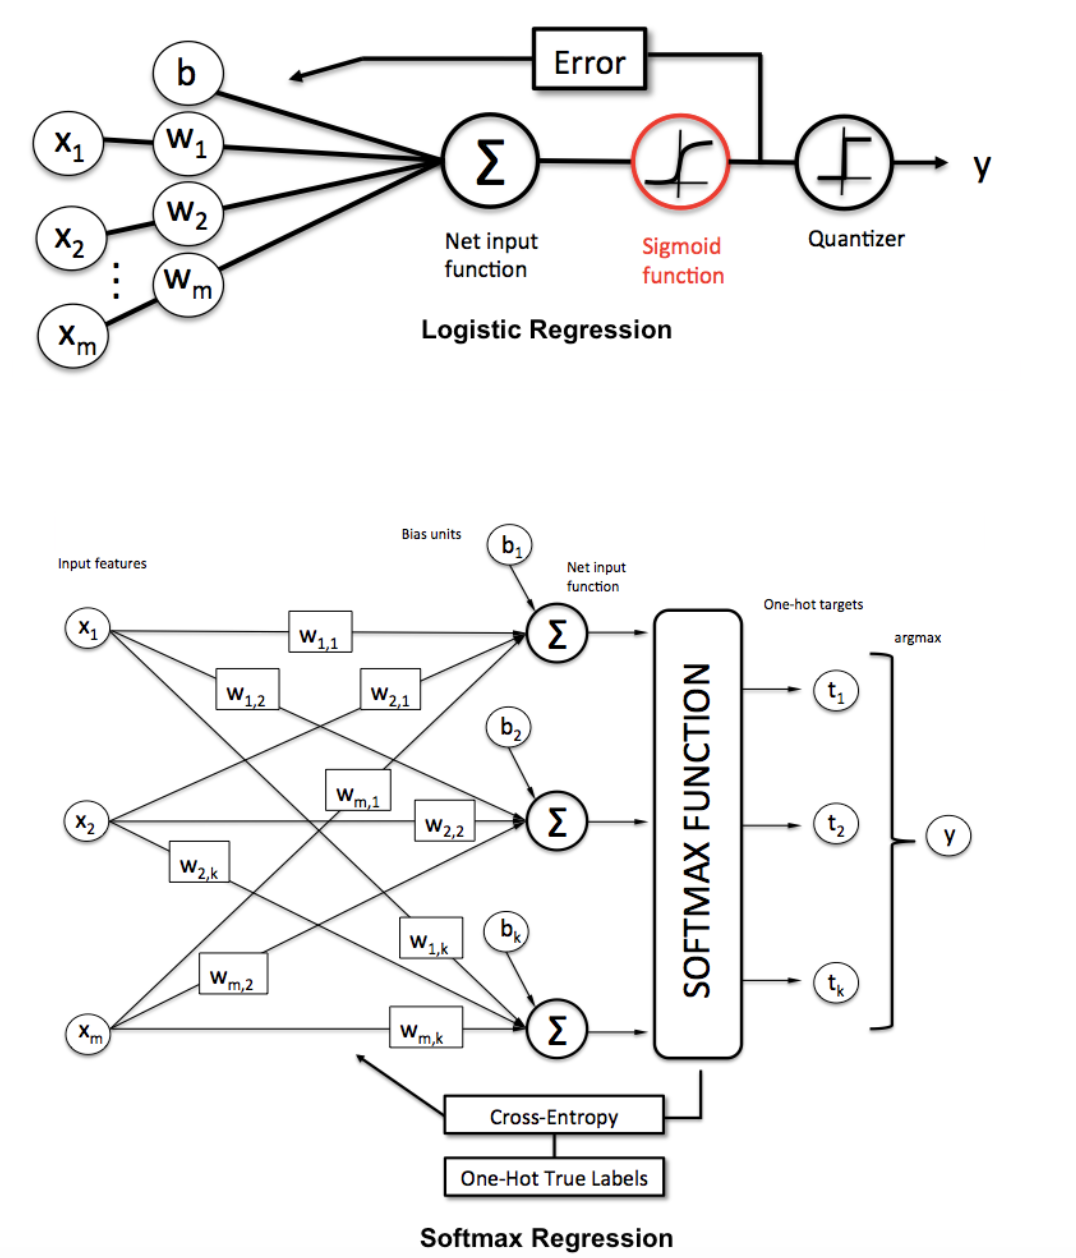

In [4]:
Image('ls.png',width=800)

# Softmax (손실) 함수의 미분  
  
이것의 미분값은 대부분의 경우에 단번에 구해지지 않을 것 같다. 이것의 미분 결과는 다음 같은 과정을 통해 구해진다.

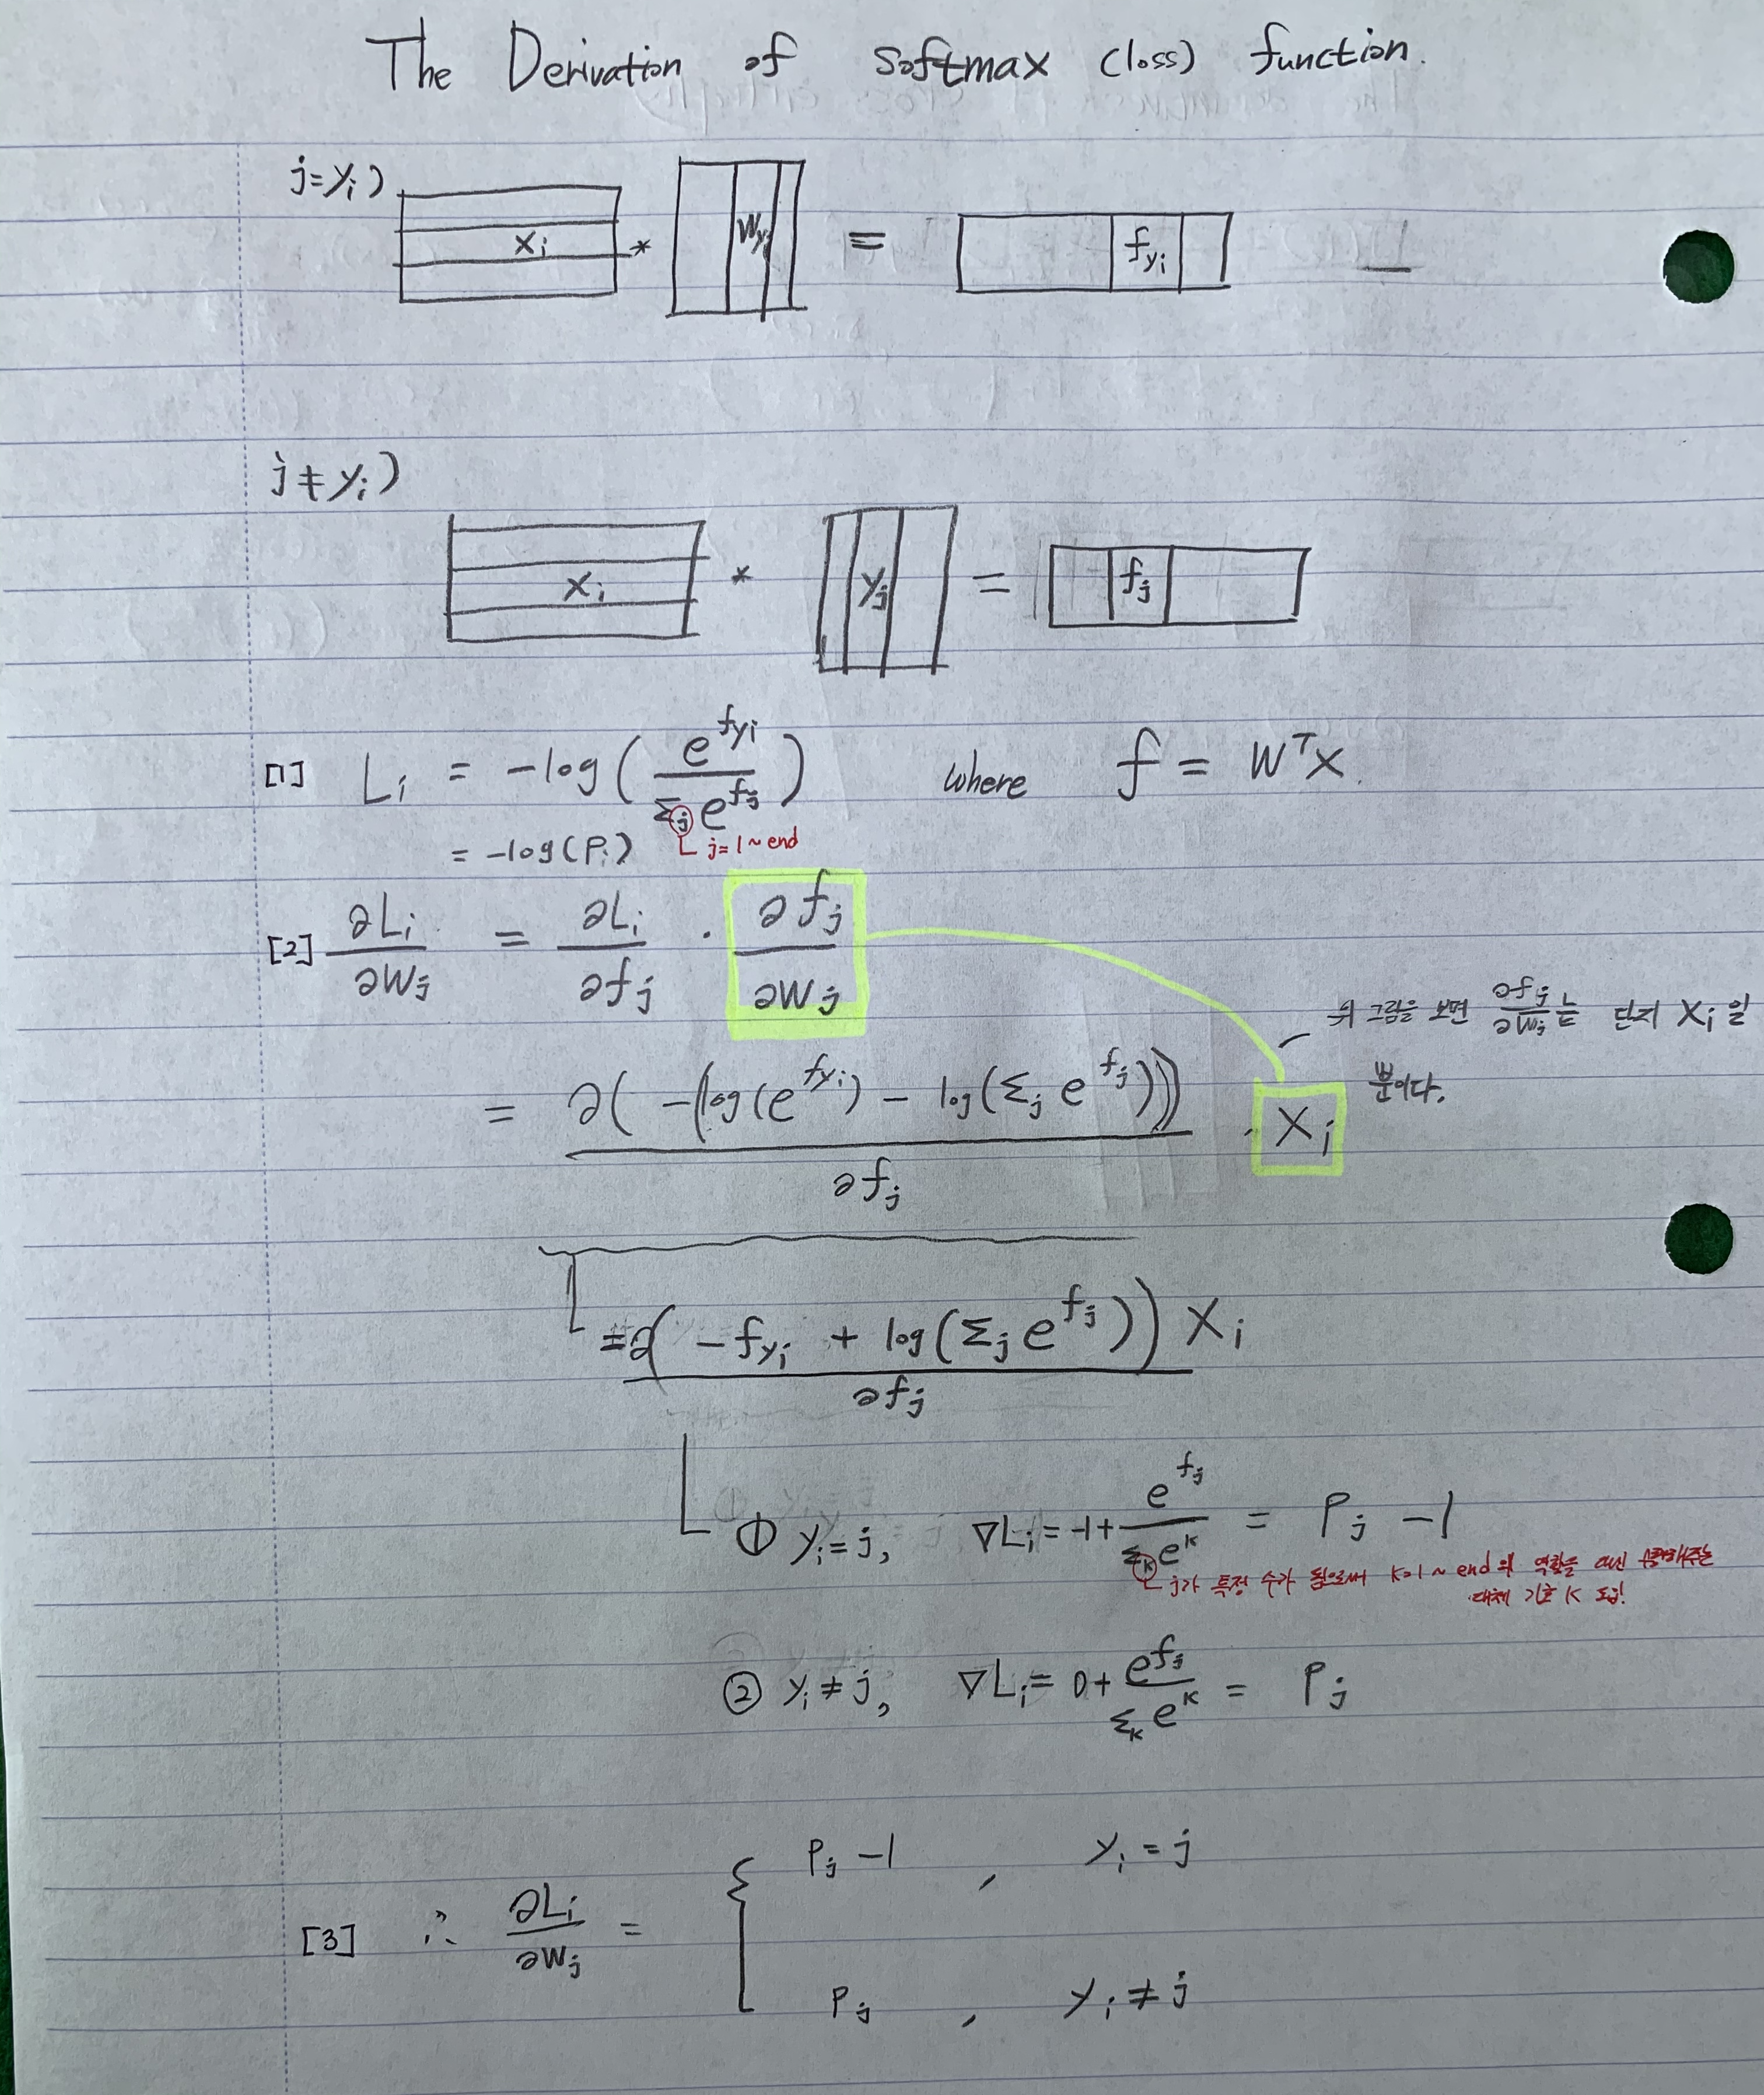

In [9]:
Image('dvsf.JPG',width=800)

# 3. Iris Classification with softmax


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

## 3.1 Data Load

In [6]:
iris = pd.read_csv('Iris.csv')
iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
iris.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

## 3.2 Split training set/test set

In [10]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
train = train.reset_index()
test = test.reset_index()

- n: 특성의 개수  
- m: 훈련 샘플의 개수

In [15]:
x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
n = x.shape[1]
m = x.shape[0]
print(x[0:3])
print('\n#features: ', n)
print('\n#samples: ',m)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.8            1.6           0.2
1            6.0           2.9            4.5           1.5
2            6.4           3.2            4.5           1.5

#features:  4

#samples:  105


## 3.2 Coding and CODING for Forward & Backward Pass  
  

### 3.2.1 Forward  
  
- $f=W^T X$  
- P $=\frac{exp^{f_{yi}}}{\sum_j exp^{f_j}}$
- $L_i = -log\frac{exp^{f_{yi}}}{\sum_j exp^{f_j}}$

In [ ]:
def Pi (i,W,X):

    mat_W = np.matrix(W[i])
    mat_X = np.matrix(X)
    
    num= np.exp(np.dot(mat_W, mat_X.T)) # 분자

    den = 0 #분모 초기화
    for j in range(0,k): # k까지 sum을 하여 분모를 구한다

        mat_Wj = np.matrix(W[j])
        den += np.exp(mat_Wj)

    return num/den

### 3.2.2 Backward  
  
- grads   
  
  - $p_j-1$,$\ \ \ $ if$\ \ $ $y_i=j$  
  - $p_j$,$\ \ \ $  if$\ \ $ $i\ne j$


In [ ]:
def grads (i,W,X,y,reg):
    
    dW = np.zeros_like(W)
    num_examples = X.shape[0]
    num_classes = W.shape[1]

    mat_y=np.matrix(y)

    P = Pi(i,W,X)

    for i in range(n_examples)
    
    # if j == yi

        dW[:,y[i]] += (P[y[i]]-1)*X[i]

    # if j != yi

        for j in range(num_classes):
            
            dW[:,j] += P[j]*X[i]

    dW /= m
    dW += reg*2*W

    return dW

### 3.2.3 손실 함수 

In [ ]:
def Li (Pi):

    loss = -1*np.log(Pi)
    loss += reg*np.sum(W**2)

    return loss

### 3.2.4 Gradient Descent

In [ ]:
def Gradient_Descent (W, lr=0.001, iters=200):

    for j in range(0,k):

        for iter in range(iters):

            W[j] = W[j] - lr*grads()






In [19]:
np.empty([])

array([[4.04595100e-316, 2.05833592e-312, 2.46151512e-312],
       [8.48798317e-313, 2.07955588e-312, 9.33678149e-313],
       [2.33419537e-312, 2.31297541e-312, 8.70018275e-313]])

# References  
  
[1] https://sebastianraschka.com/faq/docs/softmax_regression.html  
[2] https://cs231n.github.io/linear-classify/#softmax  
[3] https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification